In [ ]:
import pandas as pd
import datetime as dt
from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Weekly_United_States_COVID19_Cases_and_Deaths_by_State_ARCHIVED_20240605.csv']))
print(df)

Saving Weekly_United_States_COVID19_Cases_and_Deaths_by_State_ARCHIVED_20240605.csv to Weekly_United_States_COVID19_Cases_and_Deaths_by_State_ARCHIVED_20240605.csv
      date_updated state  start_date    end_date  tot_cases  new_cases  \
0       01/23/2020    AK  01/16/2020  01/22/2020          0          0   
1       01/30/2020    AK  01/23/2020  01/29/2020          0          0   
2       02/06/2020    AK  01/30/2020  02/05/2020          0          0   
3       02/13/2020    AK  02/06/2020  02/12/2020          0          0   
4       02/20/2020    AK  02/13/2020  02/19/2020          0          0   
...            ...   ...         ...         ...        ...        ...   
10375   04/13/2023    WY  04/06/2023  04/12/2023     186284        158   
10376   04/20/2023    WY  04/13/2023  04/19/2023     186399        115   
10377   04/27/2023    WY  04/20/2023  04/26/2023     186539        140   
10378   05/04/2023    WY  04/27/2023  05/03/2023     186668        129   
10379   05/11/2023    

In [ ]:
df['start_date'].value_counts()

start_date
01/16/2020    60
04/28/2022    60
03/03/2022    60
03/10/2022    60
03/17/2022    60
              ..
03/04/2021    60
03/11/2021    60
03/18/2021    60
03/25/2021    60
05/04/2023    60
Name: count, Length: 173, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10380 entries, 0 to 10379
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_updated         10380 non-null  object
 1   state                10380 non-null  object
 2   start_date           10380 non-null  object
 3   end_date             10380 non-null  object
 4   tot_cases            10380 non-null  int64 
 5   new_cases            10380 non-null  int64 
 6   tot_deaths           10380 non-null  int64 
 7   new_deaths           10380 non-null  int64 
 8   new_historic_cases   10380 non-null  int64 
 9   new_historic_deaths  10380 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 811.1+ KB


In [ ]:
df['state'].value_counts()

state
AK     173
AL     173
ND     173
NE     173
NH     173
NJ     173
NM     173
NV     173
NY     173
NYC    173
OH     173
OK     173
OR     173
PA     173
PR     173
PW     173
RI     173
RMI    173
SC     173
SD     173
TN     173
TX     173
UT     173
VA     173
VI     173
VT     173
WA     173
WI     173
WV     173
NC     173
MT     173
MS     173
HI     173
AR     173
AS     173
AZ     173
CA     173
CO     173
CT     173
DC     173
DE     173
FL     173
FSM    173
GA     173
GU     173
IA     173
MP     173
ID     173
IL     173
IN     173
KS     173
KY     173
LA     173
MA     173
MD     173
ME     173
MI     173
MN     173
MO     173
WY     173
Name: count, dtype: int64

In [ ]:
df['new_historic_cases'].value_counts()

new_historic_cases
0        10372
23150        1
6800         1
21397        1
4507         1
2239         1
5347         1
949          1
347          1
Name: count, dtype: int64

In [ ]:
df['new_historic_deaths'].value_counts()

new_historic_deaths
 0       10369
 5           2
 1109        1
 44          1
 469         1
 1           1
-17          1
 557         1
 273         1
 299         1
 62          1
Name: count, dtype: int64

In [ ]:
df.tail()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
10375,04/13/2023,WY,04/06/2023,04/12/2023,186284,158,2023,3,0,0
10376,04/20/2023,WY,04/13/2023,04/19/2023,186399,115,2027,4,0,0
10377,04/27/2023,WY,04/20/2023,04/26/2023,186539,140,2030,3,0,0
10378,05/04/2023,WY,04/27/2023,05/03/2023,186668,129,2031,1,0,0
10379,05/11/2023,WY,05/04/2023,05/10/2023,187034,366,2031,0,0,0


In [ ]:
may_1stWeek = df.loc[df['start_date']=='05/04/2023'].loc[df['new_cases'] > 0]
may_1stWeek.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
172,05/11/2023,AK,05/04/2023,05/10/2023,297588,199,1468,0,0,0
345,05/11/2023,AL,05/04/2023,05/10/2023,1659936,1297,21138,1,0,0
518,05/11/2023,AR,05/04/2023,05/10/2023,995043,657,13115,0,0,0
691,05/11/2023,AS,05/04/2023,05/10/2023,8331,2,34,0,0,0
864,05/11/2023,AZ,05/04/2023,05/10/2023,2474154,2608,33451,34,0,0


In [ ]:
import plotly.express as px
fig = px.pie(may_1stWeek['state'], values=may_1stWeek['tot_cases'], names=may_1stWeek['state'].unique(), title='Cumulative Count of Covid Cases')
fig.update_layout(
    autosize=False,
    width=1200,
    height=1200)
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(may_1stWeek['state'], values=may_1stWeek['tot_deaths'], names=may_1stWeek['state'].unique(), title='Cumulative Count of Covid Deaths')
fig.update_layout(
    autosize=False,
    width=1200,
    height=1200)
fig.show()

# I want to comapre covid cases per state based by population so I will add a column with the respective statepopulations

In [ ]:
Populations = [734000, 5074000, 3046000, 45000, 7359000, 39029000, 5840000, 3626000,
               672000, 1018000, 22245000, 539013, 10913000, 169000, 1440000, 1939000,
               12582000, 6833000, 2937000, 4512000, 4590000, 6982000, 6164000, 1385000,
               10034000, 5717000, 6178000, 51000, 2940000, 1123000, 10699000, 779000,
               1968000, 1395000, 9262000, 2113000, 3178000, 11341103, 8335897, 11756000,
               4020000, 4240000, 12972000, 3057000, 18055, 1094000, 5283000, 910000, 7051000,
               30029000, 3381000, 8684000, 105000, 647000, 7786000, 5893000, 1775000, 581000]


may_1stWeek.insert(1, "Population", Populations, True)

In [ ]:
may_1stWeek                                     #index 6746 nys & 6919 nyc

,date_updated,Population,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
172,05/11/2023,734000,AK,05/04/2023,05/10/2023,297588,199,1468,0,0,0
345,05/11/2023,5074000,AL,05/04/2023,05/10/2023,1659936,1297,21138,1,0,0
518,05/11/2023,3046000,AR,05/04/2023,05/10/2023,995043,657,13115,0,0,0
691,05/11/2023,45000,AS,05/04/2023,05/10/2023,8331,2,34,0,0,0
864,05/11/2023,7359000,AZ,05/04/2023,05/10/2023,2474154,2608,33451,34,0,0
1037,05/11/2023,39029000,CA,05/04/2023,05/10/2023,12251820,9186,101886,109,0,0
1210,05/11/2023,5840000,CO,05/04/2023,05/10/2023,1783663,1199,14385,14,0,0
1383,05/11/2023,3626000,CT,05/04/2023,05/10/2023,982335,388,12337,3,0,0
1556,05/11/2023,672000,DC,05/04/2023,05/10/2023,178904,75,1435,1,0,0
1729,05/11/2023,1018000,DE,05/04/2023,05/10/2023,333772,111,3394,0,0,0


In [ ]:
may_1stWeek['Cases/Pop'] = may_1stWeek.apply(lambda row: row.tot_cases / row.Population, axis=1)
fig = px.bar(may_1stWeek, x='state', y='Cases/Pop')
fig.show()

In [ ]:
may_1stWeek['Deaths/Pop'] = may_1stWeek.apply(lambda row: row.tot_deaths / row.Population, axis=1)
fig = px.bar(may_1stWeek, x='state', y='Deaths/Pop')
fig.show()

#lets see how covid has affected us over time

In [ ]:
may_1stWeek.head()

,date_updated,Population,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths,Cases/Pop,Deaths/Pop
172,05/11/2023,734000,AK,05/04/2023,05/10/2023,297588,199,1468,0,0,0,0.405433,0.002000
345,05/11/2023,5074000,AL,05/04/2023,05/10/2023,1659936,1297,21138,1,0,0,0.327145,0.004166
518,05/11/2023,3046000,AR,05/04/2023,05/10/2023,995043,657,13115,0,0,0,0.326672,0.004306
691,05/11/2023,45000,AS,05/04/2023,05/10/2023,8331,2,34,0,0,0,0.185133,0.000756
864,05/11/2023,7359000,AZ,05/04/2023,05/10/2023,2474154,2608,33451,34,0,0,0.336208,0.004546


In [ ]:
usDeath = df['tot_deaths'].mean()
usCases = df['new_cases'].mean()


print(usDeath, usCases)

10865.156936416184 10082.613487475915


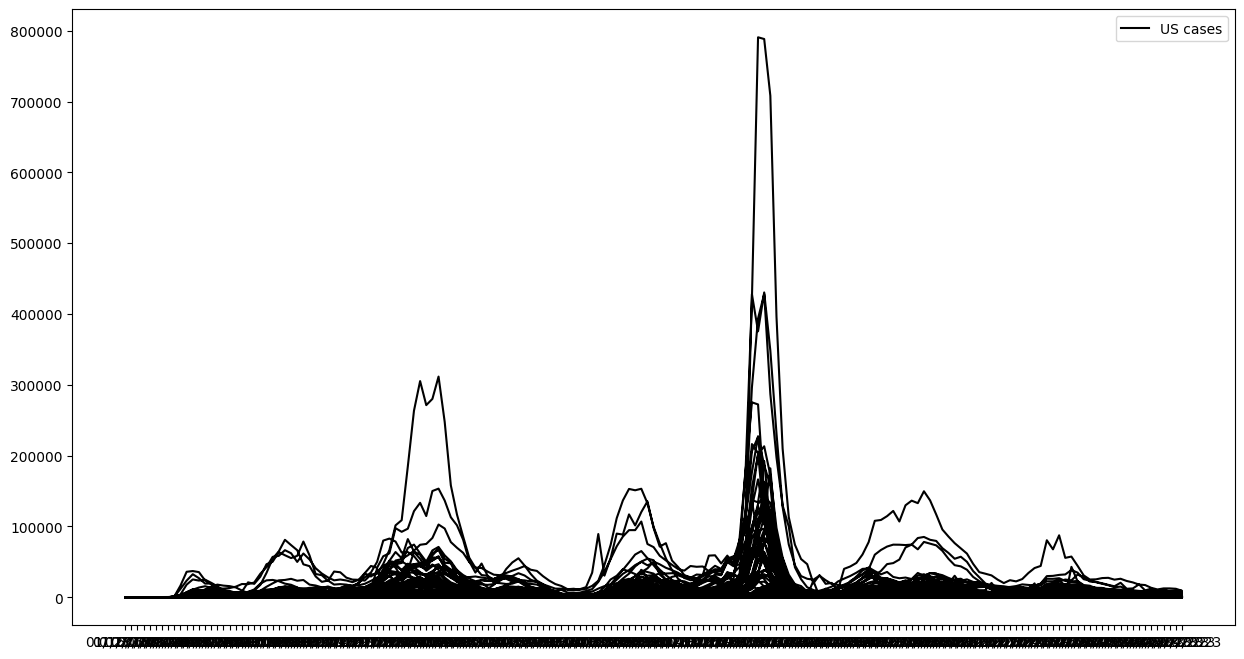

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df['start_date'],df['new_cases'], label='US cases', color='black')
ax.legend()


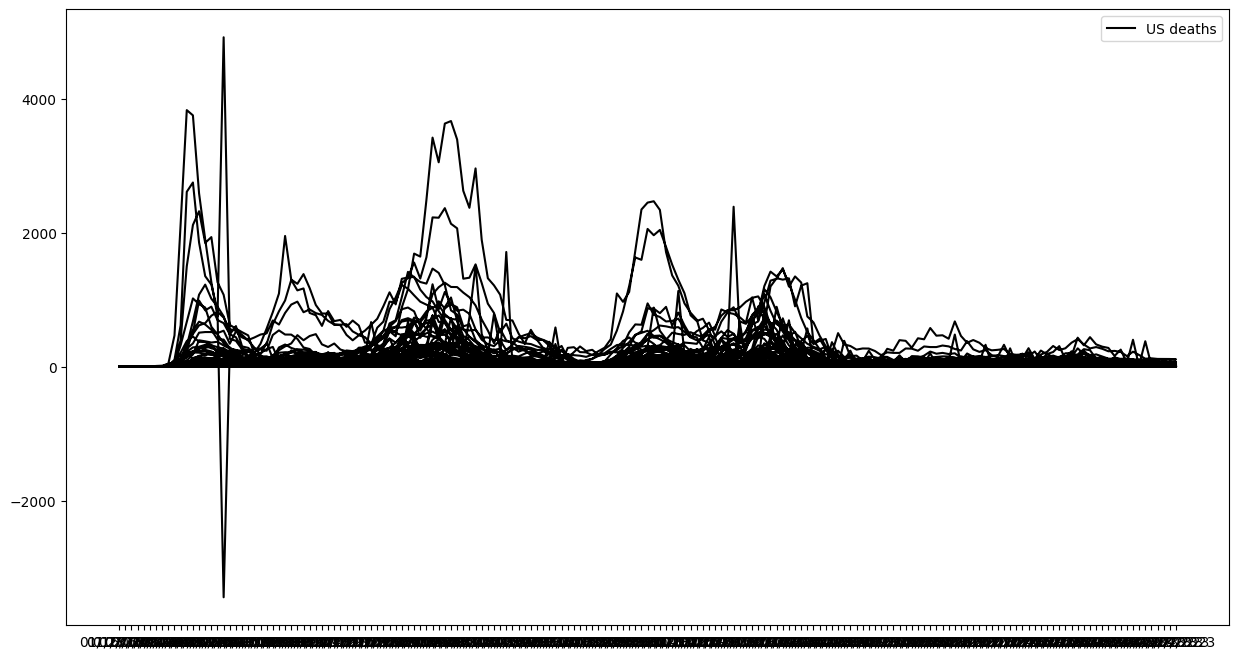

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df['start_date'],df['new_deaths'], label='US deaths', color='black')
ax.legend()

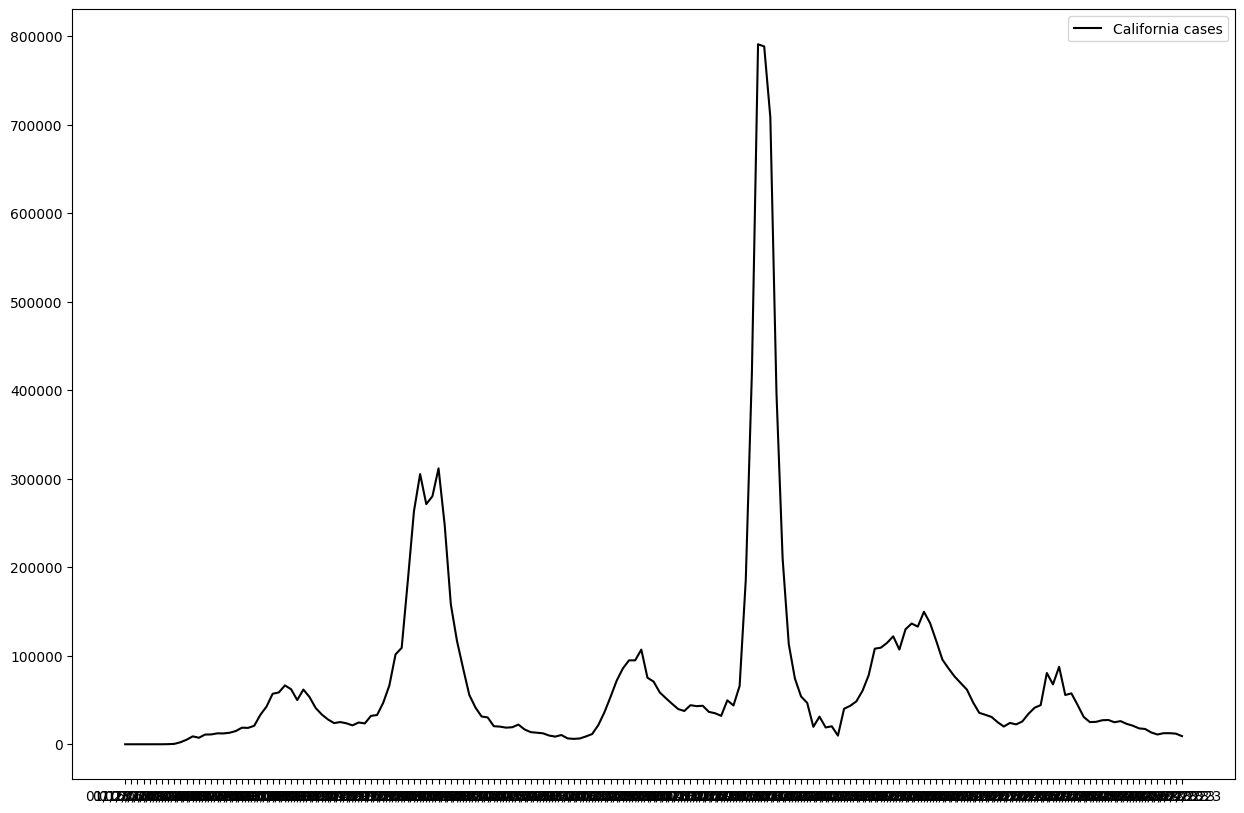

In [ ]:
caCases = df.loc[df['state']=='CA']
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(caCases['start_date'],caCases['new_cases'], label='California cases', color='black')
ax.legend()

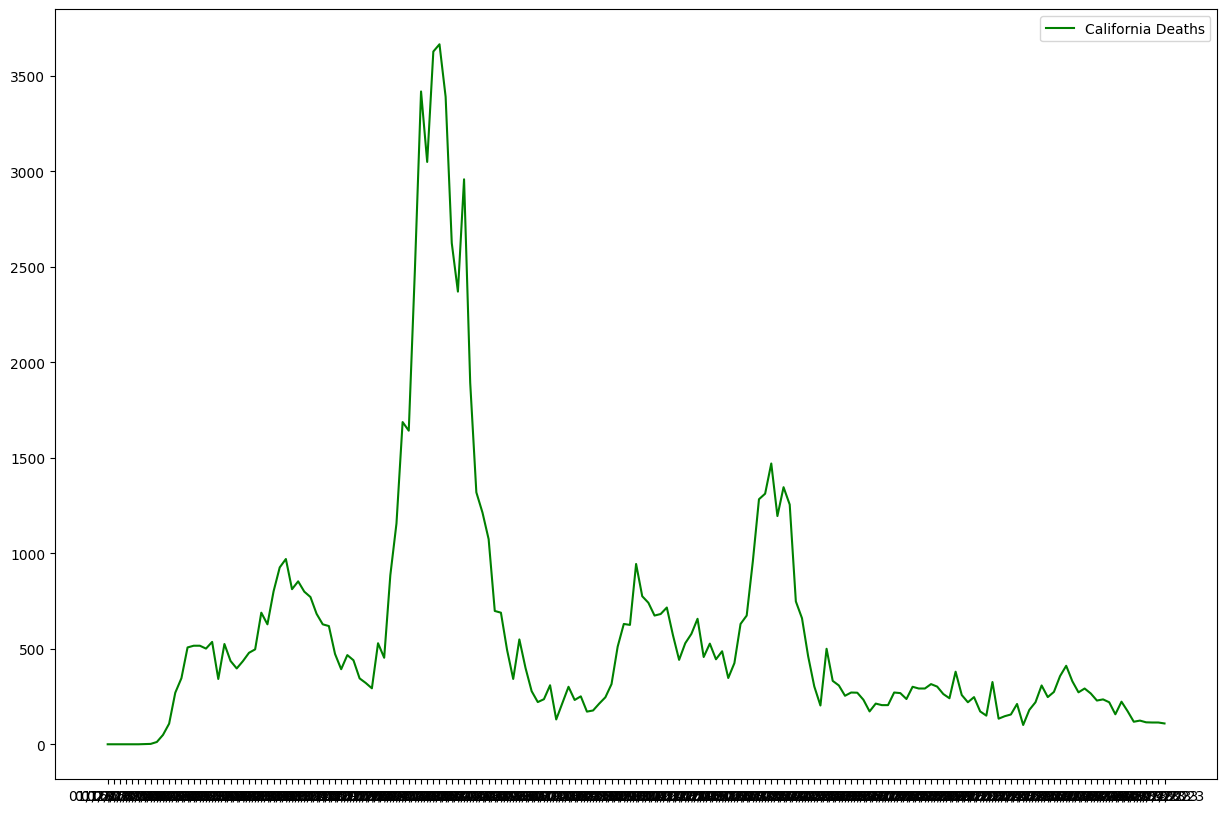

In [ ]:

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(caCases['start_date'],caCases['new_deaths'], label='California Deaths', color='green')
ax.legend()

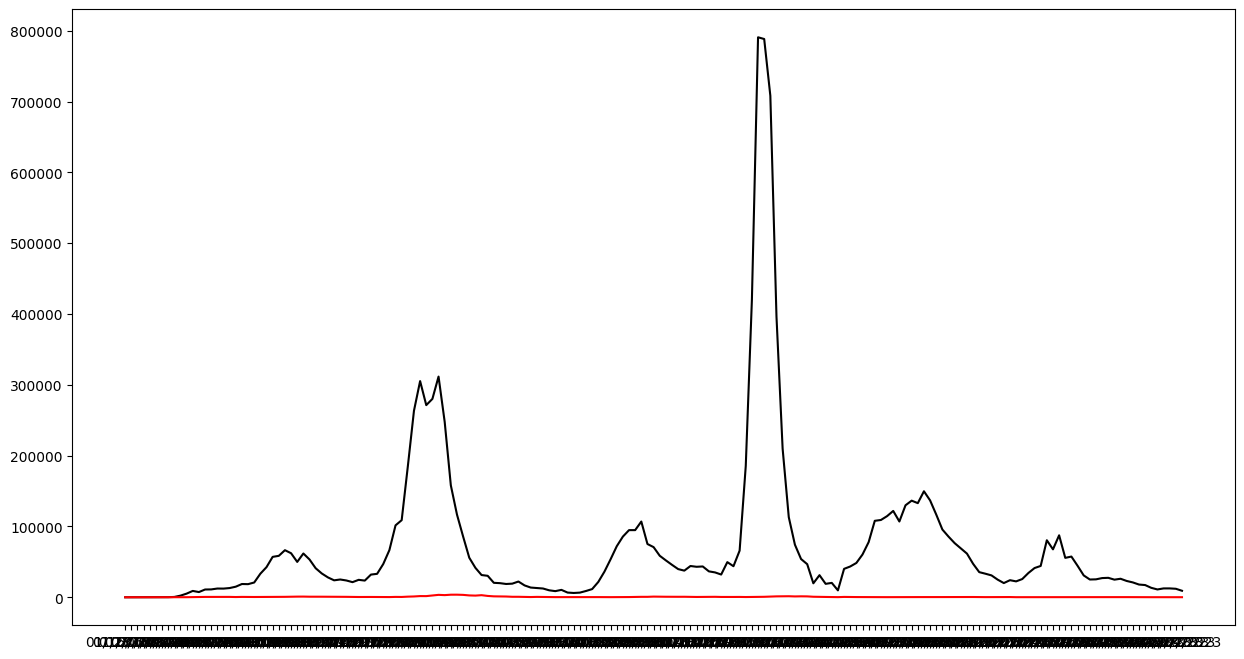

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(caCases['start_date'], caCases['new_cases'], label='Cases', color='black')
ax.plot(caCases['start_date'], caCases['new_deaths'], label='Deaths', color='red')


In [ ]:
caCases

In [ ]:
caCases['new_deaths'] *= 100


ax.plot(caCases['start_date'], caCases['new_cases'], label='Cases', color='black')
ax.plot(caCases['start_date'], caCases['new_deaths'], label='Deaths', color='red')

<ipython-input-33-ceb69cbe81bb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ax.plot(caCases['start_date'], caCases['new_cases'], label='Cases', color='black')
ax.plot(caCases['start_date'], caCases['new_deaths'], label='Deaths', color='red')
plt.show()